In [4]:
from haven import haven_jupyter as hj
from haven import haven_results as hr
from haven import haven_utils as hu
import pprint
import numpy as np

# path to where the experiments are saved
base = './outputs/'
savedir_base = base + 'output'
savedir_ijcnn = base + 'output_ijcnn'
savedir_mushroom = base + 'output_mushroom'
savedir_ijcnn_shb = base + 'output_ijcnn_shb'
savedir_mushroom_shb = base + 'output_mushroom_shb'
savedir_mushroom_shb_2 = base + 'output_mushroom_shb_2'
savedir_mushroom_shb_4 = base + 'output_mushroom_shb_4'
savedir_mushroom_fullbatch = base + 'output_mushroom_fullbatch'
savedir_mushroom_half = base + 'output_mushroom_half'
savedir_mushroom_fourth = base + 'output_mushroom_fourth'
savedir_ijcnn_half = base + 'output_ijcnn_half'
savedir_mushroom_misspec = base + 'output_mushroom_misspec_2'
savedir_mushroom_misspec_sgd = base + 'output_mushroom_misspec_sgd'
savedir_mushroom_misspec_sgd_shb = base + 'output_mushroom_misspec_sgd_shb'
savedir_mushroom_sgd_shb = base + 'output_mushroom_sgd_shb'
savedir_mushroom_sgd_shb_new = base + 'output_mushroom_sgd_shb_new'
savedir_mushroom_sgd_shb_fn = base + 'output_mushroom_sgd_shb_fn'
savedir_ijcnn_sgd_shb = base + 'output_ijcnn_sgd_shb'
savedir_ijcnn_sgd_shb_fn = base + 'output_ijcnn_sgd_shb_fn'
savedir_ijcnn_test_sls_shb = base + 'output_ijcnn_test_sls_shb'
savedir_rcv1_sgd_shb = base + 'output_rcv1_sgd_shb'
savedir_mushroom_test_sls = base + 'output_mushroom_test_sls'
savedir_mushroom_sgd_shb_cnst = base + 'output_mushroom_sgd_shb_cnst'
savedir_ijcnn_sgd_shb_cnst = base + 'output_ijcnn_sgd_shb_cnst'
savedir_rcv1_sgd_shb_cnst = base + 'output_rcv1_sgd_shb_cnst'
savedir_mushroom_ada_test = base + 'output_mushroom_ada_test'

exp_config_fname = './exp_configs.py'

runs=2

batch_sizes = {-2: 'HALF', -1: 'FULL', -4./3: 'THREE_FOURTH'}


C:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


widgets not available...
widgets not available...
widgets not available...
widgets not available...
widgets not available...
widgets not available...


In [29]:
def form_exp_list(exp_groups, exp_config_fname):
    exp_list = []
    for e in exp_groups:
        exp_list += hu.load_py(exp_config_fname).EXP_GROUPS[e]
    return exp_list


# print(form_exp_list(["exp_mushrooms", "exp_ijcnn","exp_rcv1"],exp_config_fname))


markersize = 8
markevery = 15
linewidth = 1
marker = '*'
styles = {}

styles['EXP_SGD_CNST'] = {'label':'K-CNST',  'color':'blue','marker':marker ,
                         'markersize':15, 'marker':'*',
                           'linewidth': 2,
                     'markevery':markevery }

styles['EXP_SGD_DECR'] = {'label':'K-EXP',  'color':'cyan','marker':marker ,
                         'markersize':15, 'marker':'d',
                           'linewidth': 2,
                     'markevery':markevery }


# styles['EXP_ACC_SGD_CNST'] = {'label':'ACC-K-CNST',  'color':'orange','marker':marker ,
#                          'markersize':15, 'marker':'x',
#                            'linewidth': 2,
#                      'markevery':markevery }

# styles['EXP_ACC_SGD_DECR'] = {'label':'ACC-K-EXP',  'color':'red','marker':marker ,
#                          'markersize':15, 'marker':'o',
#                            'linewidth': 2,
#                      'markevery':markevery }

# styles['EXP_SLS_DECR'] = {'label':'SLS-EXP',  'color':'green','marker':marker ,
#                          'markersize':15, 'marker':'+',
#                            'linewidth': 2,
#                      'markevery':markevery }

# styles['RIT_SGD'] = {'label':'KR-20',  'color':'black','marker':marker ,
#                          'markersize':15, 'marker':'s',
#                            'linewidth': 2,
#                      'markevery':markevery }

styles['EXP_SLS_DECR'] = {'label':'SLS-EXP',  'color':'green','marker':marker ,
                         'markersize':15, 'marker':'+',
                           'linewidth': 2,
                     'markevery':markevery }

styles['EXP_SHB_CNST'] = {'label':'SHB-EXP-POLYAK',  'color':'orange','marker':marker ,
                         'markersize':15, 'marker':'x',
                           'linewidth': 2,
                     'markevery':markevery }

styles['EXP_SHB_DECR'] = {'label':'SHB-DECR',  'color':'red','marker':marker ,
                         'markersize':15, 'marker':'o',
                           'linewidth': 2,
                     'markevery':markevery }


styles['EXP_SHB_EXP'] = {'label':'SHB-EXP',  'color':'black','marker':marker ,
                         'markersize':15, 'marker':'s',
                           'linewidth': 2,
                     'markevery':markevery }


In [5]:
def form_exp_list(exp_groups, exp_config_fname):
    exp_list = []
    for e in exp_groups:
        exp_list += hu.load_py(exp_config_fname).EXP_GROUPS[e]
    return exp_list


# print(form_exp_list(["exp_mushrooms", "exp_ijcnn","exp_rcv1"],exp_config_fname))


markersize = 8
markevery = 100
linewidth = 1
styles = {}

styles['SHB_CNST_SEBBOUH'] = {'label':'SHB-CNST',  'color':'black',
                         'markersize':markersize, 'marker':'*',
                           'linewidth': linewidth,
                     'markevery':markevery }
styles['SHB_CNST_ADA'] = {'label':'SHB-ADA',  'color':'blue',
                         'markersize':markersize, 'marker':'*',
                           'linewidth': linewidth,
                     'markevery':markevery }
# styles['SHB_CNST_WANG22_THREE_FOURTH'] = {'label':'SHB-CNST-THREE-FOURTH',  'color':'red',
#                          'markersize':markersize, 'marker':'*',
#                            'linewidth': linewidth,
#                      'markevery':markevery }

styles['SGD_CNST'] = {'label':'K-CNST',  'color':'black',
                         'markersize':markersize, 'marker':'o',
                           'linewidth': linewidth,
                     'markevery':markevery }
styles['SGD_CNST_ADA'] = {'label':'K-ADA',  'color':'blue',
                         'markersize':markersize, 'marker':'o',
                           'linewidth': linewidth,
                     'markevery':markevery }
# styles['EXP_SGD_CNST_THREE_FOURTH'] = {'label':'K-CNST-THREE-FOURTH',  'color':'red',
#                          'markersize':markersize, 'marker':'o',
#                            'linewidth': linewidth,
#                      'markevery':markevery }

# styles['EXP_SLS_DECR'] = {'label':'SLS-EXP',  'color':'yellow',
#                          'markersize':markersize, 'marker':'+',
#                            'linewidth': linewidth,
#                      'markevery':markevery }

# styles['SHB_EXP_POLYAK_1'] = {'label':'SHB-EXP-POLYAK',  'color':'black',
#                          'markersize':markersize, 'marker':'*',
#                            'linewidth': linewidth,
#                      'markevery':markevery }
# styles['SHB_CNST_POLYAK_1'] = {'label':'SHB-CNST-POLYAK',  'color':'black',
#                          'markersize':markersize, 'marker':'o',
#                            'linewidth': linewidth,
#                      'markevery':markevery }
# styles['SHB_EXP_POLYAK_100'] = {'label':'SHB-EXP-POLYAK-MIS',  'color':'blue',
#                          'markersize':markersize, 'marker':'*',
#                            'linewidth': linewidth,
#                      'markevery':markevery }
# styles['SHB_CNST_POLYAK_100'] = {'label':'SHB-CNST-POLYAK-MIS',  'color':'blue',
#                          'markersize':markersize, 'marker':'o',
#                            'linewidth': linewidth,
#                      'markevery':markevery }

# styles['SHB_EXP_GHADIMI'] = {'label':'SHB-EXP-GHADIMI',  'color':'orange',
#                          'markersize':markersize, 'marker':'*',
#                            'linewidth': 1,
#                      'markevery':markevery }
# styles['SHB_CNST_GHADIMI'] = {'label':'SHB-CNST-GHADIMI',  'color':'orange',
#                          'markersize':markersize, 'marker':'o',
#                            'linewidth': linewidth,
#                      'markevery':markevery }

# styles['SHB_EXP_WANG21'] = {'label':'SHB-EXP-WANG21',  'color':'blue',
#                          'markersize':markersize, 'marker':'*',
#                            'linewidth': linewidth,
#                      'markevery':markevery }
# styles['SHB_CNST_WANG21'] = {'label':'SHB-CNST-WANG21',  'color':'blue',
#                          'markersize':markersize, 'marker':'o',
#                            'linewidth': linewidth,
#                      'markevery':markevery }

# styles['SHB_EXP_WANG22_1'] = {'label':'SHB-EXP-WANG22',  'color':'cyan',
#                          'markersize':markersize, 'marker':'*',
#                            'linewidth': linewidth,
#                      'markevery':markevery }
# styles['SHB_CNST_WANG22_1'] = {'label':'SHB-CNST-WANG22',  'color':'cyan',
#                          'markersize':markersize, 'marker':'o',
#                            'linewidth': linewidth,
#                      'markevery':markevery }

# styles['SHB_EXP_WANG22_100'] = {'label':'SHB-EXP-WANG22-MIS',  'color':'orange',
#                          'markersize':markersize, 'marker':'*',
#                            'linewidth': linewidth,
#                      'markevery':markevery }
# styles['SHB_CNST_WANG22_100'] = {'label':'SHB-CNST-WANG22-MIS',  'color':'orange',
#                          'markersize':markersize, 'marker':'o',
#                            'linewidth': linewidth,
#                      'markevery':markevery }

# ExpList for Losses

In [31]:
datasets = ["mushrooms"]
exp_groups = []

for dataset in datasets:
    exp_groups.append("exp_" + dataset)
exp_list = form_exp_list(exp_groups, exp_config_fname)
# print([e['opt']['name'] for e in exp_list])

loss_exp_dict={}
combined_filter_dict={}

for loss_func,loss in [("squared_loss","squared"),("logistic_loss","logistic")]:
   
    rfilteres=[({"loss_func":loss_func})] 
    rest_exp=hr.filter_exp_list(exp_list, filterby_list=rfilteres, verbose=0)
    loss_exp_dict[loss_func]=rest_exp 


for loss_func,loss in [("squared_loss","squared"),("logistic_loss","logistic")]:
    filtered_best_exp_list=[]
#     filtered_best_exp_list += [        
#         ({'opt':{'name':'RIT_SGD'},  
#             "loss_func":loss_func},
#             {'style':styles["RIT_SGD"]})]

    for alpha_t in ["CNST","DECR"]: 

#         filtered_best_exp_list += [        
#             ({'opt':{'name':'EXP_ACC_SGD','alpha_t':alpha_t}, 
#                 "loss_func":loss_func},
#                {'style':styles["EXP_ACC_SGD_"+alpha_t]})]

        filtered_best_exp_list += [        
            ({'opt':{'name':'EXP_SGD','alpha_t':alpha_t, "is_sls":False },  
                "loss_func":loss_func},
               {'style':styles["EXP_SGD_"+alpha_t]})]

    filtered_best_exp_list +=[        
            ({'opt':{'name':'EXP_SGD',"is_sls":True },  
                "loss_func":loss_func},
               {'style':styles["EXP_SLS_DECR"]})]
    
    for alpha_t in ["CNST","DECR","EXP"]: 
        filtered_best_exp_list += [        
            ({'opt':{'name':'EXP_SHB','alpha_t':alpha_t, "is_sls":False },  
                "loss_func":loss_func},
               {'style':styles["EXP_SHB_"+alpha_t]})]

   
    combined_filter_dict[loss_func]=filtered_best_exp_list 
# print(combined_filter_dict["squared_loss"])
# print(loss_exp_dict["squared_loss"])
print(len(hr.filter_exp_list(loss_exp_dict["logistic_loss"], filterby_list=combined_filter_dict["logistic_loss"], verbose=0)  )  )
    

KeyError: 'EXP_SGD_CNST'

In [7]:
datasets = ["mushrooms"]
exp_groups = []

for dataset in datasets:
    exp_groups.append("exp_" + dataset)
exp_list = form_exp_list(exp_groups, exp_config_fname)
# print([e['opt']['name'] for e in exp_list])

loss_exp_dict={}
combined_filter_dict={}

for loss_func,loss in [("squared_loss","squared"),("logistic_loss","logistic")]:
   
    rfilteres=[({"loss_func":loss_func})] 
    rest_exp=hr.filter_exp_list(exp_list, filterby_list=rfilteres, verbose=0)
    loss_exp_dict[loss_func]=rest_exp 


for loss_func,loss in [("squared_loss","squared"),("logistic_loss","logistic")]:
    filtered_best_exp_list=[]
    
#     for alpha_t in ["CNST","DECR"]: 
    for alpha_t in ["CNST"]: 
#         for batch_size in [-1,-2,-4./3]:
#         for is_ADA in [True,False]:
            filtered_best_exp_list += [       
                ({
                  'opt':{'name':'EXP_SGD','alpha_t':alpha_t, "is_sls":False , 'is_ADA':False},  
                    "loss_func":loss_func},
                   {'style':styles["SGD_"+alpha_t]})]

#     filtered_best_exp_list +=[        
#             ({'opt':{'name':'EXP_SGD',"is_sls":True },  
#                 "loss_func":loss_func},
#                {'style':styles["EXP_SLS_DECR"]})]
    filtered_best_exp_list += [       
                ({
                  'opt':{'name':'EXP_SGD','alpha_t':alpha_t, "is_sls":False , 'is_ADA':True},  
                    "loss_func":loss_func},
                   {'style':styles["SGD_CNST_ADA"]})]
    
#     for alpha_t in ["CNST","EXP"]: 
    for alpha_t in ["CNST"]:
#         for method in ['SEBBOUH', 'POLYAK', 'GHADIMI', 'WANG21', 'WANG22']:
        for method in ['SEBBOUH', 'ADA']:
#             for misspec in [1,100]:
#             for batch_size in [-1,-2,-4./3]:
                filtered_best_exp_list += [        
                    ({
                      'opt':{'name':'EXP_SHB','alpha_t':alpha_t,'method':method, "is_sls":False},  
                        "loss_func":loss_func},
                       {'style':styles["SHB_"+alpha_t+"_"+method]})]
    
#     filtered_best_exp_list +=[        
#             ({'opt':{'name':'EXP_SHB',"is_sls":True },  
#                 "loss_func":loss_func},
#                {'style':styles["SHB_EXP_SEBBOUH_SLS"]})]

    combined_filter_dict[loss_func]=filtered_best_exp_list 

print(len(hr.filter_exp_list(loss_exp_dict["squared_loss"], filterby_list=combined_filter_dict["squared_loss"], verbose=0)  )  )

4


# Squared Loss

[{'dataset': 'mushrooms', 'loss_func': 'squared_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'CNST', 'method': 'ADA', 'is_sls': False, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_size': 100, 'max_epoch': 100, 'runs': 0}, {'dataset': 'mushrooms', 'loss_func': 'squared_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'CNST', 'method': 'SEBBOUH', 'is_sls': False, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_size': 100, 'max_epoch': 100, 'runs': 0}, {'dataset': 'mushrooms', 'loss_func': 'squared_loss', 'opt': {'name': 'EXP_SGD', 'alpha_t': 'CNST', 'is_sls': False, 'is_ADA': False}, 'regularization_factor': 0.01, 'batch_size': 100, 'max_epoch': 100, 'runs': 0}, {'dataset': 'mushrooms', 'loss_func': 'squared_loss', 'opt': {'name': 'EXP_SGD', 'alpha_t': 'CNST', 'is_sls': False, 'is_ADA': True}, 'regularization_factor': 0.01, 'batch_size': 100, 'max_epoch': 100, 'runs': 0}]
./plots/squared_mushroom_ada_test_0.pdf saved


[<Figure size 1700x500 with 1 Axes>]

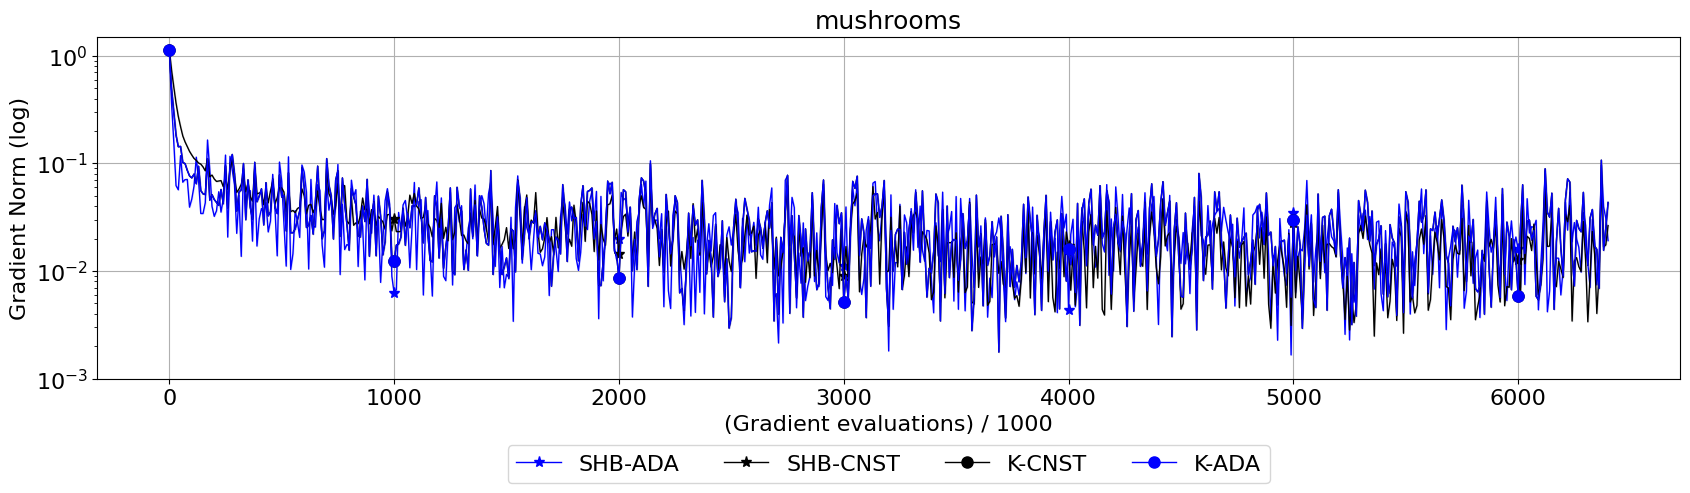

In [9]:
show_legend_all=None
rm = hr.ResultManager(
                    exp_list= loss_exp_dict["squared_loss"],
                    savedir_base=savedir_mushroom_ada_test,
                    filterby_list=combined_filter_dict["squared_loss"],
                    verbose= 0       
                     )
rm.get_plot_all(
    avg_across='runs',
    plot_median=True,
    order='metrics_by_groups',
    show_legend_all=show_legend_all,
    legend_last_row_only=True,
    y_metric_list =  ['grad_norm'], 
    x_metric='itr',
    legend_list=['opt.name'], 
    title_list = ['dataset'], 
    groupby_list = ['dataset', 'model'],
    log_metric_list = ["grad_norm"],
    legend_fontsize=16,
     x_fontsize=16,
     y_fontsize=16,
     xtick_fontsize=16,
     ytick_fontsize=16,
     title_fontsize=18,
    
     ylim_list=[
                 [(10**(-3), 1.5)]],# (10**(-3), 24), (10**(-3.1), 10**(-.8))]],
    
    map_ylabel_list=[{'train_loss':'Train loss'}, 
                     {'val_acc':'Validation accuracy'},
                     {'grad_norm': 'Gradient Norm'},
                     {'alpha_k': 'alpha_k'},
                     {'beta_k': 'beta_k'},
                     {'n_grad_evals': 'Number of stochastic gradient evaluations'}],
    map_xlabel_list=[{'itr': '(Gradient evaluations) / 1000'}],
                figsize=(17,5),
    plot_confidence=True,
     legend_kwargs={'bbox_to_anchor':[0.5, -0.25], 
                           'borderaxespad':0., 
                           'ncol':7,'loc':'center'},
    savedir_plots='./plots/squared_mushroom_ada_test'
            )

# Logistic Loss

[{'dataset': 'mushrooms', 'loss_func': 'logistic_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'EXP', 'method': 'SEBBOUH', 'is_sls': True, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_size': 100, 'max_epoch': 1000, 'runs': 0}, {'dataset': 'mushrooms', 'loss_func': 'logistic_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'EXP', 'method': 'SEBBOUH', 'is_sls': True, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_size': 100, 'max_epoch': 1000, 'runs': 1}, {'dataset': 'mushrooms', 'loss_func': 'logistic_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'EXP', 'method': 'SEBBOUH', 'is_sls': True, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_size': 100, 'max_epoch': 1000, 'runs': 2}, {'dataset': 'mushrooms', 'loss_func': 'logistic_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'EXP', 'method': 'SEBBOUH', 'is_sls': True, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_size': 100, 'max_epoch': 1000, 'runs': 3}, {'dataset': 'mushrooms', 'loss_func': 'logistic_loss', 'opt': {

[<Figure size 1200x500 with 1 Axes>]

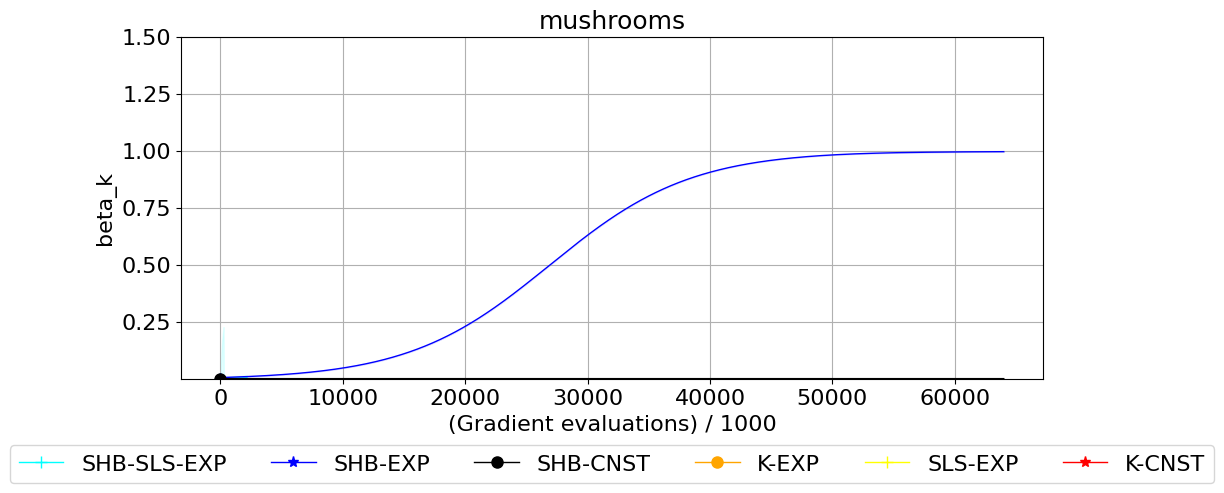

In [235]:
show_legend_all=None
rm = hr.ResultManager(
                    exp_list= loss_exp_dict["logistic_loss"],
                    savedir_base=savedir_mushroom_sgd_shb,
                    filterby_list=combined_filter_dict["logistic_loss"],
                    verbose= 0       
                     )


rm.get_plot_all(
    avg_across='runs',
    plot_median=True,
    order='metrics_by_groups',
    show_legend_all=show_legend_all,
    legend_last_row_only=True,
    y_metric_list =  ['beta_k'], 
    x_metric='itr',
    legend_list=['opt.name'], 
    title_list = ['dataset'], 
    groupby_list = ['dataset', 'model'],
    log_metric_list = ["grad_norm"],
    legend_fontsize=16,
     x_fontsize=16,
     y_fontsize=16,
     xtick_fontsize=16,
     ytick_fontsize=16,
     title_fontsize=18,
      ylim_list=[
                 [(10**(-6), 1.5)]],#, (10**(-3.3), 10**(-0.1)), (10**(-3.6), 10**(-1))]],    
    map_ylabel_list=[{'train_loss':'Train loss'}, 
                     {'val_acc':'Validation accuracy'},
                     {'grad_norm': 'Gradient Norm'},
                     {'alpha_k': 'alpha_k'},
                     {'beta_k': 'beta_k'},
                     {'n_grad_evals': 'Number of stochastic gradient evaluations'}],
    map_xlabel_list=[{'itr': '(Gradient evaluations) / 1000'}],
                figsize=(12,5),
    plot_confidence=True,
     legend_kwargs={'bbox_to_anchor':[0.5, -0.25], 'ncol':7, 'loc':'center'},
    savedir_plots='./logistic_mushroom_sgd_shb_betak'
            )

In [22]:
datasets = ["ijcnn"]
exp_groups = []

for dataset in datasets:
    exp_groups.append("exp_" + dataset)
exp_list = form_exp_list(exp_groups, exp_config_fname)
# print([e['opt']['name'] for e in exp_list])

loss_exp_dict={}
combined_filter_dict={}

for loss_func,loss in [("squared_loss","squared"),("logistic_loss","logistic")]:
   
    rfilteres=[({"loss_func":loss_func})] 
    rest_exp=hr.filter_exp_list(exp_list, filterby_list=rfilteres, verbose=0)
    loss_exp_dict[loss_func]=rest_exp 

for loss_func,loss in [("squared_loss","squared"),("logistic_loss","logistic")]:
    filtered_best_exp_list=[]
    
    for alpha_t in ["CNST"]: 
        for batch_size in [-1,-2,-4./3]:
            filtered_best_exp_list += [       
                ({'batch_size': batch_size,
                  'opt':{'name':'EXP_SGD','alpha_t':alpha_t, "is_sls":False },  
                    "loss_func":loss_func},
                   {'style':styles["EXP_SGD_"+alpha_t+"_"+batch_sizes[batch_size]]})]

#     filtered_best_exp_list +=[        
#             ({'opt':{'name':'EXP_SGD',"is_sls":True },  
#                 "loss_func":loss_func},
#                {'style':styles["EXP_SLS_DECR"]})]
    
#     for alpha_t in ["CNST","EXP"]: 
    for alpha_t in ["CNST"]:
#         for method in ['SEBBOUH', 'POLYAK', 'GHADIMI', 'WANG21', 'WANG22']:
        for method in ['WANG22']:
#             for misspec in [1,100]:
            for batch_size in [-1,-2,-4./3]:
                filtered_best_exp_list += [        
                    ({'batch_size': batch_size, 
                      'opt':{'name':'EXP_SHB','alpha_t':alpha_t,'method':method, "is_sls":False},  
                        "loss_func":loss_func},
                       {'style':styles["SHB_"+alpha_t+"_"+method+"_"+batch_sizes[batch_size]]})]

    combined_filter_dict[loss_func]=filtered_best_exp_list 

print(len(hr.filter_exp_list(loss_exp_dict["squared_loss"], filterby_list=combined_filter_dict["squared_loss"], verbose=0)  )  )
    

# for loss_func,loss in [("squared_loss","squared"),("logistic_loss","logistic")]:
#     filtered_best_exp_list=[]
# #     filtered_best_exp_list += [        
# #         ({'opt':{'name':'RIT_SGD'},  
# #             "loss_func":loss_func},
# #             {'style':styles["RIT_SGD"]})]

#     for alpha_t in ["CNST","DECR"]: 

# #         filtered_best_exp_list += [        
# #             ({'opt':{'name':'EXP_ACC_SGD','alpha_t':alpha_t}, 
# #                 "loss_func":loss_func},
# #                {'style':styles["EXP_ACC_SGD_"+alpha_t]})]

#         filtered_best_exp_list += [        
#             ({'opt':{'name':'EXP_SGD','alpha_t':alpha_t, "is_sls":False },  
#                 "loss_func":loss_func},
#                {'style':styles["EXP_SGD_"+alpha_t]})]

#     filtered_best_exp_list +=[        
#             ({'opt':{'name':'EXP_SGD',"is_sls":True },  
#                 "loss_func":loss_func},
#                {'style':styles["EXP_SLS_DECR"]})]
    
#     for alpha_t in ["CNST","DECR","EXP"]: 
#         filtered_best_exp_list += [        
#             ({'opt':{'name':'EXP_SHB','alpha_t':alpha_t, "is_sls":False },  
#                 "loss_func":loss_func},
#                {'style':styles["EXP_SHB_"+alpha_t]})]

   
#     combined_filter_dict[loss_func]=filtered_best_exp_list 
# # print(combined_filter_dict["squared_loss"])
# # print(loss_exp_dict["squared_loss"])
# print(len(hr.filter_exp_list(loss_exp_dict["logistic_loss"], filterby_list=combined_filter_dict["logistic_loss"], verbose=0)  )  )
    

30


[{'dataset': 'ijcnn', 'loss_func': 'squared_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'CNST', 'method': 'WANG22', 'is_sls': False, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_size': -1, 'max_epoch': 10000, 'runs': 0}, {'dataset': 'ijcnn', 'loss_func': 'squared_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'CNST', 'method': 'WANG22', 'is_sls': False, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_size': -1, 'max_epoch': 10000, 'runs': 1}, {'dataset': 'ijcnn', 'loss_func': 'squared_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'CNST', 'method': 'WANG22', 'is_sls': False, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_size': -1, 'max_epoch': 10000, 'runs': 2}, {'dataset': 'ijcnn', 'loss_func': 'squared_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'CNST', 'method': 'WANG22', 'is_sls': False, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_size': -1, 'max_epoch': 10000, 'runs': 3}, {'dataset': 'ijcnn', 'loss_func': 'squared_loss', 'opt': {'name': 'EXP_SHB', 'a

[<Figure size 1900x500 with 1 Axes>]

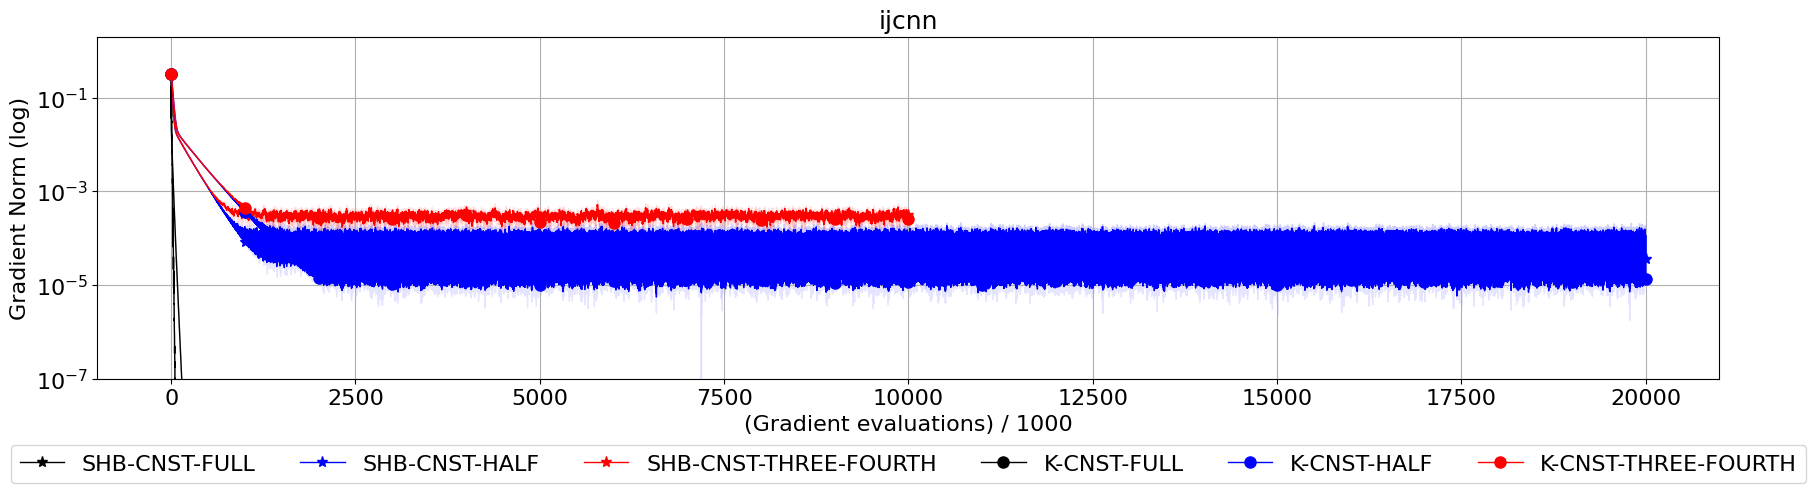

In [24]:

show_legend_all=None
rm = hr.ResultManager(
                    exp_list= loss_exp_dict["squared_loss"],
                    savedir_base=savedir_ijcnn_sgd_shb_cnst,
                    filterby_list=combined_filter_dict["squared_loss"],
                    verbose= 0       
                     )
rm.get_plot_all(
    avg_across='runs',
    plot_median=True,
    order='metrics_by_groups',
    show_legend_all=show_legend_all,
    legend_last_row_only=True,
    y_metric_list =  ['grad_norm'], 
    x_metric='itr',
    legend_list=['opt.name'], 
    title_list = ['dataset'], 
    groupby_list = ['dataset', 'model'],
    log_metric_list = ["grad_norm"],
    legend_fontsize=16,
     x_fontsize=16,
     y_fontsize=16,
     xtick_fontsize=16,
     ytick_fontsize=16,
     title_fontsize=18,
    
     ylim_list=[
                 [(10**(-7), 2.)]],# (10**(-3), 24), (10**(-3.1), 10**(-.8))]],
    
    map_ylabel_list=[{'train_loss':'Train loss'}, 
                     {'val_acc':'Validation accuracy'},
                     {'grad_norm': 'Gradient Norm'},
                     {'n_grad_evals': 'Number of stochastic gradient evaluations'}],
    map_xlabel_list=[{'itr': '(Gradient evaluations) / 1000'}],
                figsize=(19,5),
    plot_confidence=True,
     legend_kwargs={'bbox_to_anchor':[0.5, -0.25],
                           'borderaxespad':0., 
                           'ncol':7,'loc':'center'},
    savedir_plots='./plots/squared_ijcnn_sgd_shb_cnst'
            )

[{'dataset': 'ijcnn', 'loss_func': 'logistic_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'EXP', 'method': 'SEBBOUH', 'is_sls': True, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_size': 100, 'max_epoch': 100, 'runs': 0}, {'dataset': 'ijcnn', 'loss_func': 'logistic_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'EXP', 'method': 'SEBBOUH', 'is_sls': True, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_size': 100, 'max_epoch': 100, 'runs': 1}, {'dataset': 'ijcnn', 'loss_func': 'logistic_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'EXP', 'method': 'SEBBOUH', 'is_sls': True, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_size': 100, 'max_epoch': 100, 'runs': 2}, {'dataset': 'ijcnn', 'loss_func': 'logistic_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'EXP', 'method': 'SEBBOUH', 'is_sls': True, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_size': 100, 'max_epoch': 100, 'runs': 3}, {'dataset': 'ijcnn', 'loss_func': 'logistic_loss', 'opt': {'name': 'EXP_SHB', 'alph

[<Figure size 1200x500 with 1 Axes>]

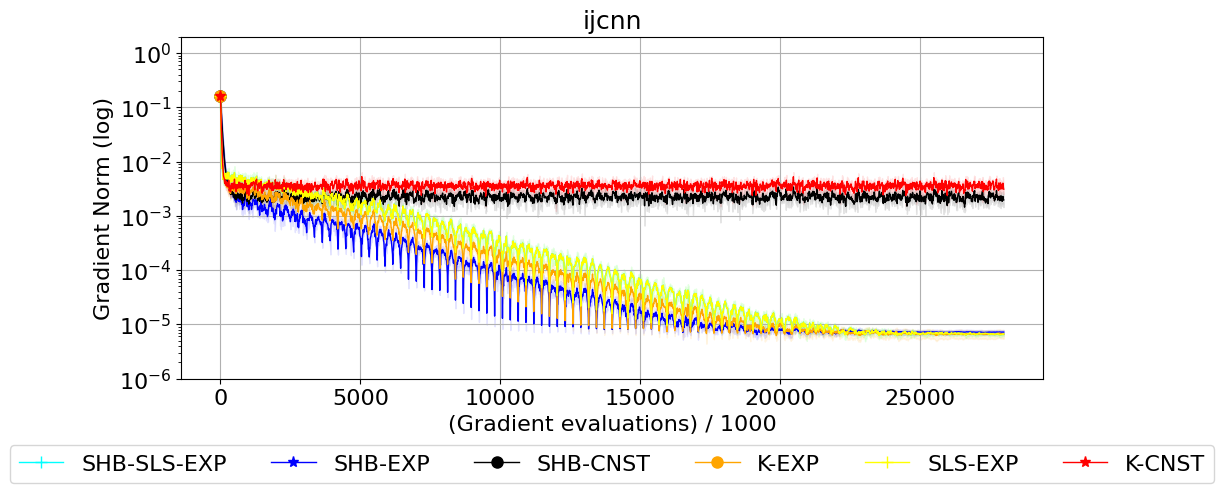

In [92]:
show_legend_all=None
rm = hr.ResultManager(
                    exp_list= loss_exp_dict["logistic_loss"],
                    savedir_base=savedir_ijcnn_sgd_shb_fn,
                    filterby_list=combined_filter_dict["logistic_loss"],
                    verbose= 0       
                     )


rm.get_plot_all(
    avg_across='runs',
    plot_median=True,
    order='metrics_by_groups',
    show_legend_all=show_legend_all,
    legend_last_row_only=True,
    y_metric_list =  ['grad_norm'], 
    x_metric='itr',
    legend_list=['opt.name'], 
    title_list = ['dataset'], 
    groupby_list = ['dataset', 'model'],
    log_metric_list = ["grad_norm"],
    legend_fontsize=16,
     x_fontsize=16,
     y_fontsize=16,
     xtick_fontsize=16,
     ytick_fontsize=16,
     title_fontsize=18,
      ylim_list=[
                 [(10**(-6), 2.)]],#, (10**(-3.3), 10**(-0.1)), (10**(-3.6), 10**(-1))]],    
    map_ylabel_list=[{'train_loss':'Train loss'}, 
                     {'val_acc':'Validation accuracy'},
                     {'grad_norm': 'Gradient Norm'},
                     {'n_grad_evals': 'Number of stochastic gradient evaluations'}],
    map_xlabel_list=[{'itr': '(Gradient evaluations) / 1000'}],
                figsize=(12,5),
    plot_confidence=True,
     legend_kwargs={'bbox_to_anchor':[0.5, -0.25], 'ncol':7, 'loc':'center'},
    savedir_plots='./logistic_ijcnn_sgd_shb_fn'
            )

In [30]:
datasets = ["rcv1"]
exp_groups = []

for dataset in datasets:
    exp_groups.append("exp_" + dataset)
exp_list = form_exp_list(exp_groups, exp_config_fname)
# print([e['opt']['name'] for e in exp_list])

loss_exp_dict={}
combined_filter_dict={}

for loss_func,loss in [("squared_loss","squared"),("logistic_loss","logistic")]:
   
    rfilteres=[({"loss_func":loss_func})] 
    rest_exp=hr.filter_exp_list(exp_list, filterby_list=rfilteres, verbose=0)
    loss_exp_dict[loss_func]=rest_exp 

for loss_func,loss in [("squared_loss","squared"),("logistic_loss","logistic")]:
    filtered_best_exp_list=[]
    
    for alpha_t in ["CNST"]: 
        for batch_size in [-1,-2,-4./3]:
            filtered_best_exp_list += [       
                ({'batch_size': batch_size,
                  'opt':{'name':'EXP_SGD','alpha_t':alpha_t, "is_sls":False },  
                    "loss_func":loss_func},
                   {'style':styles["EXP_SGD_"+alpha_t+"_"+batch_sizes[batch_size]]})]

#     filtered_best_exp_list +=[        
#             ({'opt':{'name':'EXP_SGD',"is_sls":True },  
#                 "loss_func":loss_func},
#                {'style':styles["EXP_SLS_DECR"]})]
    
#     for alpha_t in ["CNST","EXP"]: 
    for alpha_t in ["CNST"]:
#         for method in ['SEBBOUH', 'POLYAK', 'GHADIMI', 'WANG21', 'WANG22']:
        for method in ['WANG22']:
#             for misspec in [1,100]:
            for batch_size in [-1,-2,-4./3]:
                filtered_best_exp_list += [        
                    ({'batch_size': batch_size, 
                      'opt':{'name':'EXP_SHB','alpha_t':alpha_t,'method':method, "is_sls":False},  
                        "loss_func":loss_func},
                       {'style':styles["SHB_"+alpha_t+"_"+method+"_"+batch_sizes[batch_size]]})]

    combined_filter_dict[loss_func]=filtered_best_exp_list 

print(len(hr.filter_exp_list(loss_exp_dict["squared_loss"], filterby_list=combined_filter_dict["squared_loss"], verbose=0)  )  )
    

30


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[{'dataset': 'rcv1', 'loss_func': 'squared_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'CNST', 'method': 'WANG22', 'is_sls': False, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_size': -1, 'max_epoch': 10000, 'runs': 0, 'is_subsample': 1, 'subsampled_n': 10000}, {'dataset': 'rcv1', 'loss_func': 'squared_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'CNST', 'method': 'WANG22', 'is_sls': False, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_size': -1, 'max_epoch': 10000, 'runs': 1, 'is_subsample': 1, 'subsampled_n': 10000}, {'dataset': 'rcv1', 'loss_func': 'squared_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'CNST', 'method': 'WANG22', 'is_sls': False, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_size': -1, 'max_epoch': 10000, 'runs': 2, 'is_subsample': 1, 'subsampled_n': 10000}, {'dataset': 'rcv1', 'loss_func': 'squared_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'CNST', 'method': 'WANG22', 'is_sls': False, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_

[<Figure size 1900x500 with 1 Axes>]

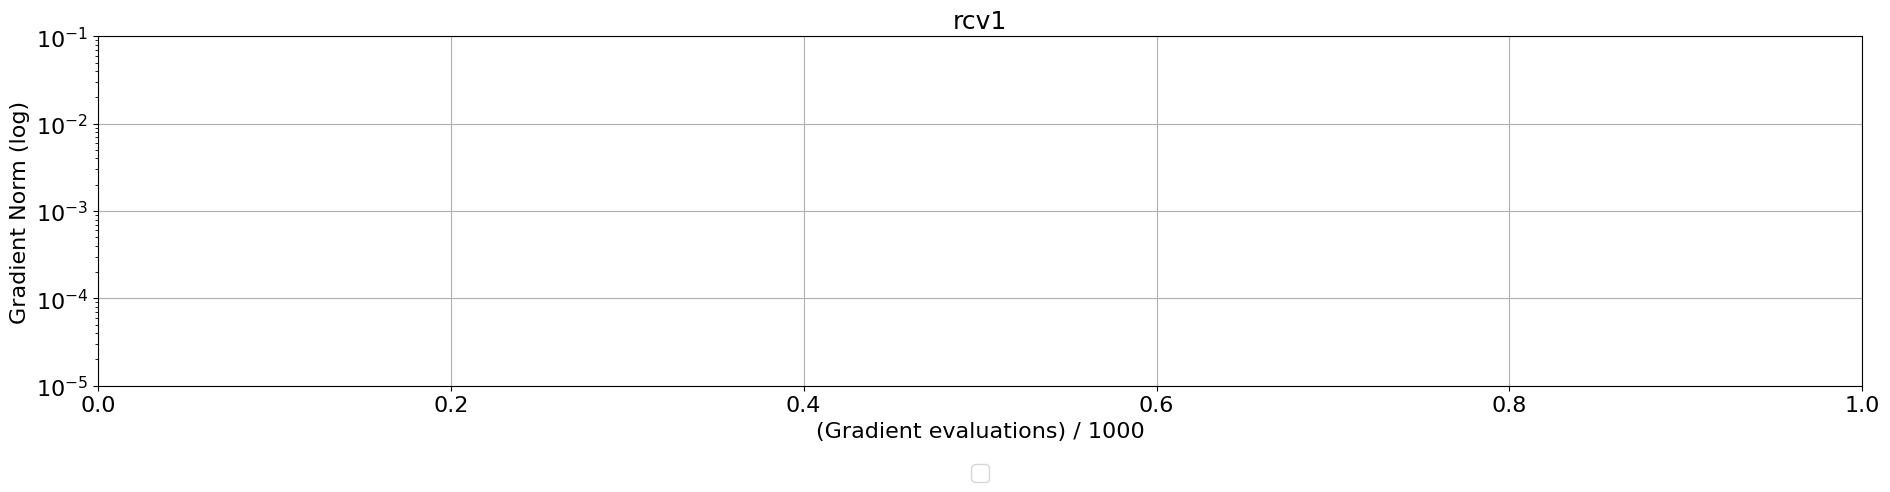

In [31]:
show_legend_all=None
rm = hr.ResultManager(
                    exp_list= loss_exp_dict["squared_loss"],
                    savedir_base=savedir_rcv1_sgd_shb_cnst,
                    filterby_list=combined_filter_dict["squared_loss"],
                    verbose= 0       
                     )
rm.get_plot_all(
    avg_across='runs',
    plot_median=True,
    order='metrics_by_groups',
    show_legend_all=show_legend_all,
    legend_last_row_only=True,
    y_metric_list =  ['grad_norm'], 
    x_metric='itr',
    legend_list=['opt.name'], 
    title_list = ['dataset'], 
    groupby_list = ['dataset', 'model'],
    log_metric_list = ["grad_norm"],
    legend_fontsize=16,
     x_fontsize=16,
     y_fontsize=16,
     xtick_fontsize=16,
     ytick_fontsize=16,
     title_fontsize=18,
    
     ylim_list=[
                 [(10**(-5), 10**(-1))]],# (10**(-3), 24), (10**(-3.1), 10**(-.8))]],
    
    map_ylabel_list=[{'train_loss':'Train loss'}, 
                     {'val_acc':'Validation accuracy'},
                     {'grad_norm': 'Gradient Norm'},
                     {'n_grad_evals': 'Number of stochastic gradient evaluations'}],
    map_xlabel_list=[{'itr': '(Gradient evaluations) / 1000'}],
                figsize=(19,5),
    plot_confidence=True,
     legend_kwargs={'bbox_to_anchor':[.5, -0.25], 
                           'borderaxespad':0., 
                           'ncol':7,'loc':'center'},
    savedir_plots='./plots/squared_rcv1_sgd_shb_cnst'
            )

[{'dataset': 'rcv1', 'loss_func': 'logistic_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'EXP', 'method': 'SEBBOUH', 'is_sls': True, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_size': 100, 'max_epoch': 100, 'runs': 0, 'is_subsample': 1, 'subsampled_n': 10000}, {'dataset': 'rcv1', 'loss_func': 'logistic_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'EXP', 'method': 'SEBBOUH', 'is_sls': True, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_size': 100, 'max_epoch': 100, 'runs': 1, 'is_subsample': 1, 'subsampled_n': 10000}, {'dataset': 'rcv1', 'loss_func': 'logistic_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'EXP', 'method': 'SEBBOUH', 'is_sls': True, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_size': 100, 'max_epoch': 100, 'runs': 2, 'is_subsample': 1, 'subsampled_n': 10000}, {'dataset': 'rcv1', 'loss_func': 'logistic_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'EXP', 'method': 'SEBBOUH', 'is_sls': True, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_siz

[<Figure size 1200x500 with 1 Axes>]

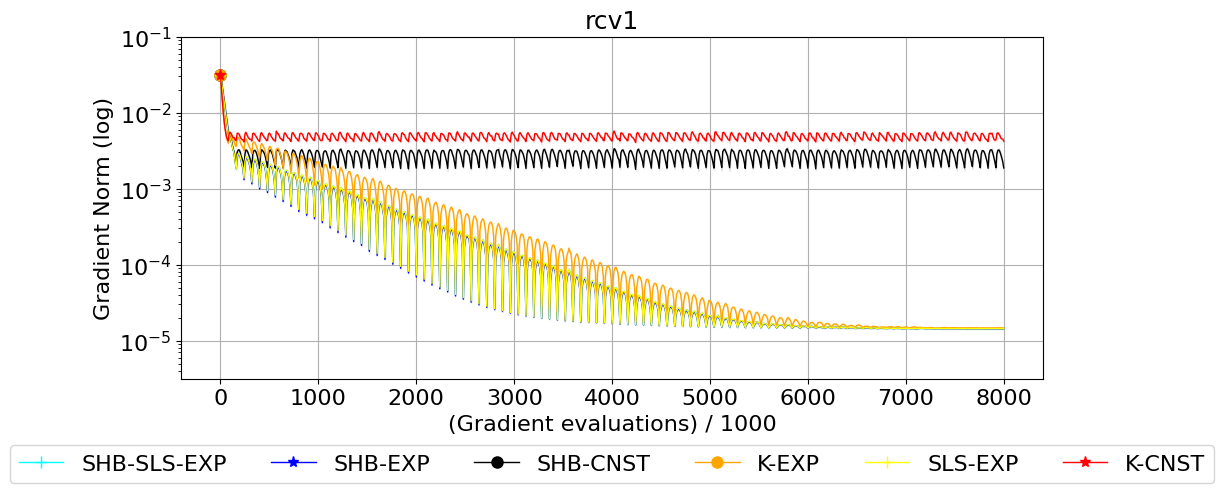

In [273]:
show_legend_all=None
rm = hr.ResultManager(
                    exp_list= loss_exp_dict["logistic_loss"],
                    savedir_base=savedir_rcv1_sgd_shb,
                    filterby_list=combined_filter_dict["logistic_loss"],
                    verbose= 0       
                     )


rm.get_plot_all(
    avg_across='runs',
    plot_median=True,
    order='metrics_by_groups',
    show_legend_all=show_legend_all,
    legend_last_row_only=True,
    y_metric_list =  ['grad_norm'], 
    x_metric='itr',
    legend_list=['opt.name'], 
    title_list = ['dataset'], 
    groupby_list = ['dataset', 'model'],
    log_metric_list = ["grad_norm"],
    legend_fontsize=16,
     x_fontsize=16,
     y_fontsize=16,
     xtick_fontsize=16,
     ytick_fontsize=16,
     title_fontsize=18,
      ylim_list=[
                 [(10**(-5.5), 10**(-1))]],#, (10**(-3.3), 10**(-0.1)), (10**(-3.6), 10**(-1))]],    
    map_ylabel_list=[{'train_loss':'Train loss'}, 
                     {'val_acc':'Validation accuracy'},
                     {'grad_norm': 'Gradient Norm'},
                     {'n_grad_evals': 'Number of stochastic gradient evaluations'}],
    map_xlabel_list=[{'itr': '(Gradient evaluations) / 1000'}],
                figsize=(12,5),
    plot_confidence=True,
     legend_kwargs={'bbox_to_anchor':[.5, -0.25], 'ncol':6, 'loc':'center'},
    savedir_plots='./logistic_rcv1_sgd_shb'
            )

In [263]:
datasets = ["rcv1"]
exp_groups = []

for dataset in datasets:
    exp_groups.append("exp_" + dataset)
exp_list = form_exp_list(exp_groups, exp_config_fname)
# print([e['opt']['name'] for e in exp_list])

loss_exp_dict={}
combined_filter_dict={}

for loss_func,loss in [("squared_loss","squared"),("logistic_loss","logistic")]:
   
    rfilteres=[({"loss_func":loss_func})] 
    rest_exp=hr.filter_exp_list(exp_list, filterby_list=rfilteres, verbose=0)
    loss_exp_dict[loss_func]=rest_exp 

for loss_func,loss in [("squared_loss","squared"),("logistic_loss","logistic")]:
    filtered_best_exp_list=[]
    
    for alpha_t in ["EXP","CNST"]: 
        for method in ['SEBBOUH']:
            filtered_best_exp_list += [        
                ({'opt':{'name':'EXP_SHB','alpha_t':alpha_t,'method':method, "is_sls":False },  
                    "loss_func":loss_func},
                   {'style':styles["SHB_"+alpha_t+"_"+method]})]
    filtered_best_exp_list +=[        
        ({'opt':{'name':'EXP_SHB',"is_sls":True },  
            "loss_func":loss_func},
           {'style':styles["SHB_EXP_SEBBOUH_SLS"]})]

    combined_filter_dict[loss_func]=filtered_best_exp_list 

print(len(hr.filter_exp_list(loss_exp_dict["logistic_loss"], filterby_list=combined_filter_dict["logistic_loss"], verbose=0)))
    

15


[{'dataset': 'rcv1', 'loss_func': 'logistic_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'EXP', 'method': 'SEBBOUH', 'is_sls': True, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_size': 100, 'max_epoch': 100, 'runs': 0, 'is_subsample': 1, 'subsampled_n': 10000}, {'dataset': 'rcv1', 'loss_func': 'logistic_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'EXP', 'method': 'SEBBOUH', 'is_sls': True, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_size': 100, 'max_epoch': 100, 'runs': 1, 'is_subsample': 1, 'subsampled_n': 10000}, {'dataset': 'rcv1', 'loss_func': 'logistic_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'EXP', 'method': 'SEBBOUH', 'is_sls': True, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_size': 100, 'max_epoch': 100, 'runs': 2, 'is_subsample': 1, 'subsampled_n': 10000}, {'dataset': 'rcv1', 'loss_func': 'logistic_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'EXP', 'method': 'SEBBOUH', 'is_sls': True, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_siz

[<Figure size 1200x500 with 1 Axes>]

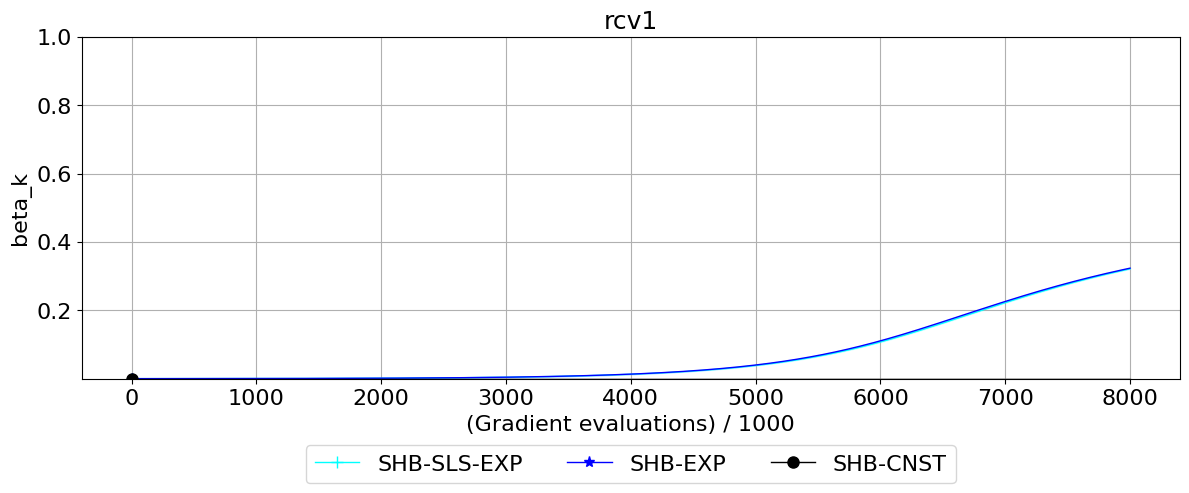

In [269]:
show_legend_all=None
rm = hr.ResultManager(
                    exp_list= loss_exp_dict["logistic_loss"],
                    savedir_base=savedir_rcv1_sgd_shb,
                    filterby_list=combined_filter_dict["logistic_loss"],
                    verbose= 0       
                     )


rm.get_plot_all(
    avg_across='runs',
    plot_median=True,
    order='metrics_by_groups',
    show_legend_all=show_legend_all,
    legend_last_row_only=True,
    y_metric_list =  ['beta_k'], 
    x_metric='itr',
    legend_list=['opt.name'], 
    title_list = ['dataset'], 
    groupby_list = ['dataset', 'model'],
    log_metric_list = ['grad_norm', 'alpha_k'],
    legend_fontsize=16,
     x_fontsize=16,
     y_fontsize=16,
     xtick_fontsize=16,
     ytick_fontsize=16,
     title_fontsize=18,
      ylim_list=[
                 [(10**(-4), 1)]],#, (10**(-3.3), 10**(-0.1)), (10**(-3.6), 10**(-1))]],    
    map_ylabel_list=[{'train_loss':'Train loss'}, 
                     {'val_acc':'Validation accuracy'},
                     {'grad_norm': 'Gradient Norm'},
                     {'alpha_k': 'alpha_k'},
                     {'beta_k': 'beta_k'},
                     {'n_grad_evals': 'Number of stochastic gradient evaluations'}],
    map_xlabel_list=[{'itr': '(Gradient evaluations) / 1000'}],
                figsize=(12,5),
    plot_confidence=True,
     legend_kwargs={'bbox_to_anchor':[.5, -0.25], 'ncol':6, 'loc':'center'},
    savedir_plots='./logistic_rcv1_sgd_shb_betak'
            )

[{'dataset': 'rcv1', 'loss_func': 'squared_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'EXP', 'method': 'SEBBOUH', 'is_sls': True, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_size': 100, 'max_epoch': 100, 'runs': 0, 'is_subsample': 1, 'subsampled_n': 10000}, {'dataset': 'rcv1', 'loss_func': 'squared_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'EXP', 'method': 'SEBBOUH', 'is_sls': True, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_size': 100, 'max_epoch': 100, 'runs': 1, 'is_subsample': 1, 'subsampled_n': 10000}, {'dataset': 'rcv1', 'loss_func': 'squared_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'EXP', 'method': 'SEBBOUH', 'is_sls': True, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_size': 100, 'max_epoch': 100, 'runs': 2, 'is_subsample': 1, 'subsampled_n': 10000}, {'dataset': 'rcv1', 'loss_func': 'squared_loss', 'opt': {'name': 'EXP_SHB', 'alpha_t': 'EXP', 'method': 'SEBBOUH', 'is_sls': True, 'mis_spec': 1}, 'regularization_factor': 0.01, 'batch_size': 

[<Figure size 1200x500 with 1 Axes>]

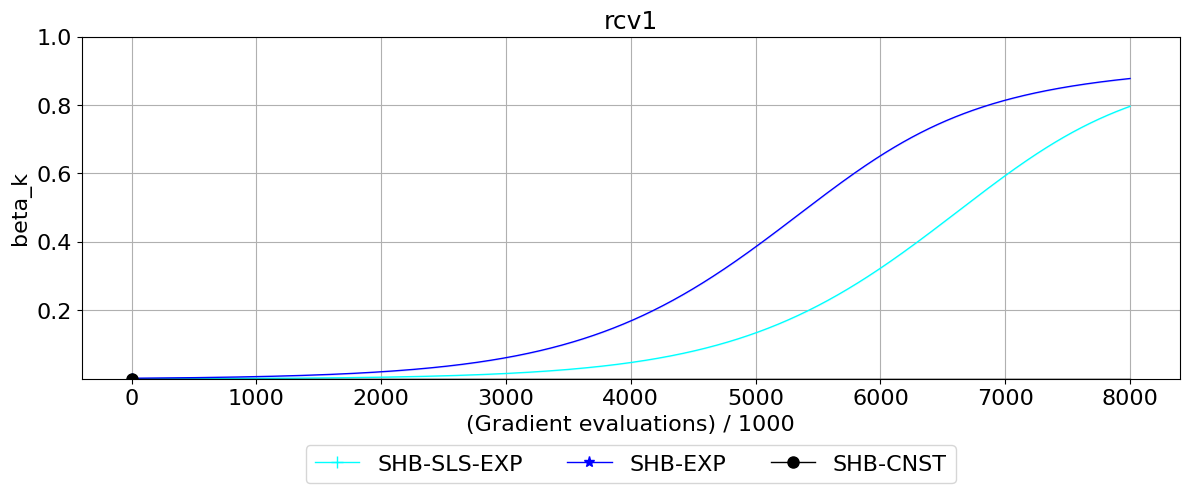

In [268]:
show_legend_all=None
rm = hr.ResultManager(
                    exp_list= loss_exp_dict["squared_loss"],
                    savedir_base=savedir_rcv1_sgd_shb,
                    filterby_list=combined_filter_dict["squared_loss"],
                    verbose= 0       
                     )
rm.get_plot_all(
    avg_across='runs',
    plot_median=True,
    order='metrics_by_groups',
    show_legend_all=show_legend_all,
    legend_last_row_only=True,
    y_metric_list =  ['beta_k'], 
    x_metric='itr',
    legend_list=['opt.name'], 
    title_list = ['dataset'], 
    groupby_list = ['dataset', 'model'],
    log_metric_list = ['alpha_k'],
    legend_fontsize=16,
     x_fontsize=16,
     y_fontsize=16,
     xtick_fontsize=16,
     ytick_fontsize=16,
     title_fontsize=18,
    
     ylim_list=[
                 [((10)**(-6), 1)]],# (10**(-3), 24), (10**(-3.1), 10**(-.8))]],
    
    map_ylabel_list=[{'train_loss':'Train loss'}, 
                     {'val_acc':'Validation accuracy'},
                     {'grad_norm': 'Gradient Norm'},
                     {'alpha_k': 'alpha_k'},
                     {'beta_k': 'beta_k'},
                     {'n_grad_evals': 'Number of stochastic gradient evaluations'}],
    map_xlabel_list=[{'itr': '(Gradient evaluations) / 1000'}],
                figsize=(12,5),
    plot_confidence=True,
     legend_kwargs={'bbox_to_anchor':[.5, -0.25], 
                           'borderaxespad':0., 
                           'ncol':7,'loc':'center'},
    savedir_plots='./squared_rcv1_sgd_shb_betak'
            )